# Visualize Results of Matching Runs from CORP Runs with extra processing 3
This is data from the following runs:
- 0 - original
- 1 - with "address_cleaning()" which is street name normalization and "." removal
- 2 - using the field types "Address" and "Name"

## Import in data from runs

In [2]:
import pandas as pd

In [4]:
data_df = pd.read_csv('corp_match_runs_12_13.csv')

In [5]:
data_df['settings_file'].unique()

array(['dedupe_extension/settings_0', 'dedupe_extension/settings_1',
       'dedupe_extension/settings_2', 'dedupe_extension/settings_3',
       'dedupe_extension/settings_4',
       'dedupe_extension/settings/settings_0',
       'dedupe_extension/settings/settings_1',
       'dedupe_extension/settings/settings_2',
       'dedupe_extension/settings/settings_3',
       'dedupe_extension/settings/settings_4'], dtype=object)

In [6]:
data_df.shape

(75, 14)

In [7]:
data_df

,run_id,completed,predicates,total_clusters,avg_cluster_size,biggest_cluster_size,biggest_cluster,total_donors,donor_type,total_run_time,donor_cluster_ratio,settings_file,settings_file_proc,processing
0,12,11/29/20 12:14,"(ExistsPredicate: (Exists, zip), SimplePredica...",4094,3.645335,73,unitemized:124539,30516,CORP,1204.672363,7.453835,dedupe_extension/settings_0,settings_0,0
1,13,11/29/20 12:15,"(SimplePredicate: (sameFiveCharStartPredicate,...",4135,3.217896,92,unitemized:124539,30516,CORP,60.673950,7.379927,dedupe_extension/settings_1,settings_1,0
2,14,11/29/20 12:17,"(SimplePredicate: (doubleMetaphone, state), Si...",4189,3.645261,83,unitemized:124539,30516,CORP,114.452933,7.284794,dedupe_extension/settings_2,settings_2,0
3,15,11/29/20 12:19,"(ExistsPredicate: (Exists, city), SimplePredic...",4172,3.652685,75,unitemized:124539,30516,CORP,110.346118,7.314477,dedupe_extension/settings_3,settings_3,0
4,16,11/29/20 12:36,(SimplePredicate: (sameSevenCharStartPredicate...,4108,3.634615,97,unitemized:124539,30516,CORP,1008.662108,7.428432,dedupe_extension/settings_4,settings_4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,242,12/13/20 6:20,"(ExistsPredicate: (Exists, zip), SimplePredica...",18768,4.500586,250,v.o.t.e./c.o.p.e.:606091,129832,CORP,12054.447740,6.917732,dedupe_extension/settings/settings_0,settings_0,2
71,243,12/13/20 6:32,"(SimplePredicate: (sameFiveCharStartPredicate,...",20191,3.981972,348,unitemized unitemized:483507,129832,CORP,688.336670,6.430192,dedupe_extension/settings/settings_1,settings_1,2
72,244,12/13/20 7:00,"(SimplePredicate: (doubleMetaphone, state), Si...",19880,4.321479,291,unitemized unitemized:483507,129832,CORP,1700.920003,6.530785,dedupe_extension/settings/settings_2,settings_2,2
73,245,12/13/20 7:54,"(ExistsPredicate: (Exists, city), SimplePredic...",19461,4.434613,146,1199 seiu pac:483726,129832,CORP,3221.978712,6.671394,dedupe_extension/settings/settings_3,settings_3,2


In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import linspace

In [78]:
files = ['settings_0','settings_1','settings_2','settings_3','settings_4']
processing = [0,1]

In [26]:
spectrum = [.3,.5,.75]
purple = [cm.Purples(x) for x in spectrum]
blue = [cm.Blues(x) for x in spectrum]
green = [cm.Greens(x) for x in spectrum]
orange = [cm.Oranges(x) for x in spectrum]
red = [cm.Reds(x) for x in spectrum]
colors = [purple, blue, green, orange, red]

In [37]:
ratio_sets = []
for i, file in enumerate(files):
    data_cut = data_df[data_df['settings_file_proc'] == file].sort_values('total_donors')
    for level in processing:
        color = colors[i][level]
        data_set=data_cut[data_cut['processing']==level]
        ratio_sets.append([data_set['total_donors'].values, data_set['donor_cluster_ratio'].values, 
                           file + ' proc ' + str(level),
                           color])

In [38]:
ratio_sets

[[array([ 30516,  57603,  82661, 106745, 129832]),
  array([7.45383488, 6.96108761, 6.80673584, 6.8072827 , 6.79677521]),
  'settings_0 proc 0',
  (0.8096885813148789, 0.81119569396386, 0.898961937716263, 1.0)],
 [array([ 30516,  57603,  82661, 106745, 129832]),
  array([7.51810791, 7.03161621, 6.88899075, 6.89077529, 6.91773231]),
  'settings_0 proc 1',
  (0.617762399077278, 0.6021376393694733, 0.7834525182622069, 1.0)],
 [array([ 30516,  57603,  82661, 106745, 129832]),
  array([7.51810791, 7.03075796, 6.88899075, 6.89077529, 6.91773231]),
  'settings_0 proc 2',
  (0.4136562860438293, 0.3137716262975778, 0.6373702422145329, 1.0)],
 [array([ 30516,  57603,  82661, 106745, 129832]),
  array([7.37992745, 6.67087435, 6.36784531, 6.33952963, 6.26602317]),
  'settings_1 proc 0',
  (0.7161860822760477, 0.8332026143790849, 0.916155324875048, 1.0)],
 [array([ 30516,  57603,  82661, 106745, 129832]),
  array([7.41219335, 6.73482988, 6.46142422, 6.46900188, 6.43019167]),
  'settings_1 proc 1',


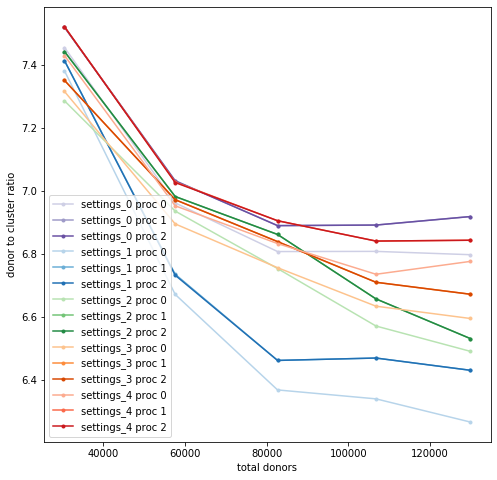

In [39]:
plt.figure(figsize=(8,8))
for s in ratio_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('donor to cluster ratio')
plt.legend()

In [79]:
ratio_sets_1 = [[],[],[],[],[]]
for i, file in enumerate(files):
    data_cut = data_df[data_df['settings_file_proc'] == file].sort_values('total_donors')
    for level in processing:
        color = colors[i][level]
        data_set=data_cut[data_cut['processing']==level]
        ratio_sets_1[i].append([data_set['total_donors'].values, data_set['donor_cluster_ratio'].values, 
                           file + ' proc ' + str(level),
                           color])

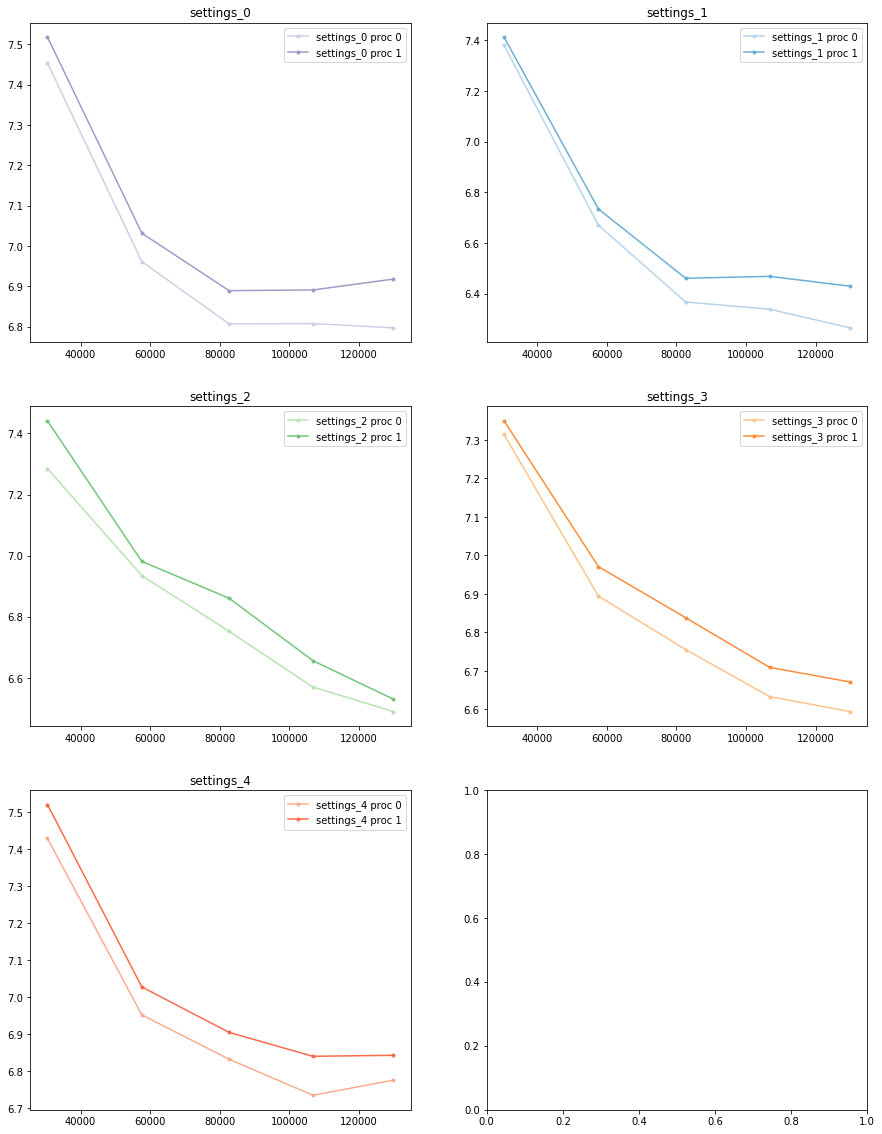

In [80]:
fig, axs = plt.subplots(3, 2,figsize=(15,20))
plt_num = 0
for x in range(3):
    for y in range(2):
        if plt_num < 5:
            s = ratio_sets_1[plt_num]
            for line in s:
                axs[x,y].plot(line[0],line[1], ms=6, marker='.', label=line[2], color=line[3])
                axs[x,y].set_title(line[2].split(" ")[0])
                axs[x,y].legend()
            plt_num += 1

In [40]:
avg_size_sets = []
for i, file in enumerate(files):
    data_cut = data_df[data_df['settings_file_proc'] == file].sort_values('total_donors')
    for level in processing:
        color = colors[i][level]
        data_set=data_cut[data_cut['processing']==level]
        avg_size_sets.append([data_set['total_donors'].values, data_set['avg_cluster_size'].values, 
                           file + ' proc ' + str(level),
                           color])

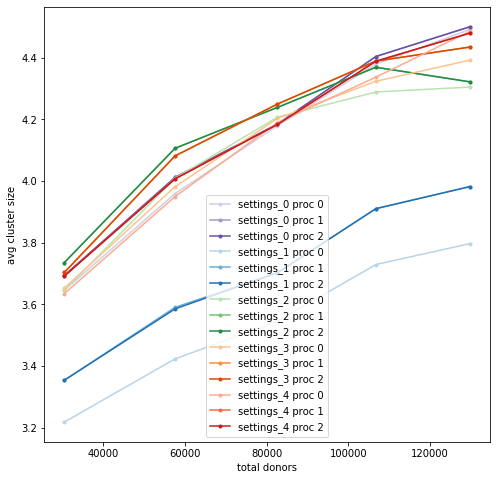

In [41]:
plt.figure(figsize=(8,8))
for s in avg_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('avg cluster size')
plt.legend()

In [74]:
avg_size_sets_1 = [[],[],[],[],[]]
for i, file in enumerate(files):
    data_cut = data_df[data_df['settings_file_proc'] == file].sort_values('total_donors')
    for level in processing:
        color = colors[i][level]
        data_set=data_cut[data_cut['processing']==level]
        avg_size_sets_1[i].append([data_set['total_donors'].values, data_set['avg_cluster_size'].values, 
                           file + ' proc ' + str(level),
                           color])

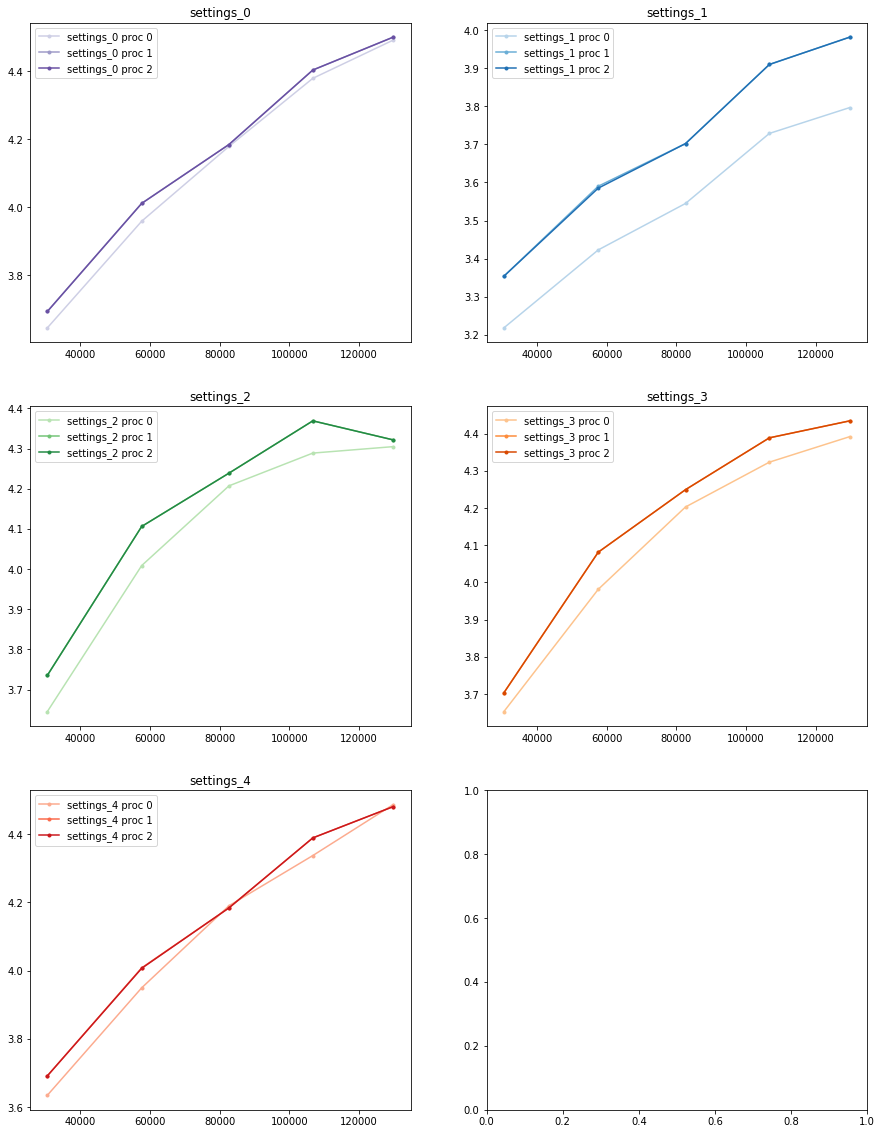

In [75]:
fig, axs = plt.subplots(3, 2,figsize=(15,20))
plt_num = 0
for x in range(3):
    for y in range(2):
        if plt_num < 5:
            s = avg_size_sets_1[plt_num]
            for line in s:
                axs[x,y].plot(line[0],line[1], ms=6, marker='.', label=line[2], color=line[3])
                axs[x,y].set_title(line[2].split(" ")[0])
                axs[x,y].legend()
            plt_num += 1

In [42]:
biggest_size_sets = []
for i,file in enumerate(files):
    data_cut = data_df[data_df['settings_file_proc'] == file].sort_values('total_donors')
    for level in processing:
        color = colors[i][level]
        data_set=data_cut[data_cut['processing']==level]
        biggest_size_sets.append([data_set['total_donors'].values, data_set['biggest_cluster_size'].values, 
                           file + ' proc ' + str(level),
                           color])

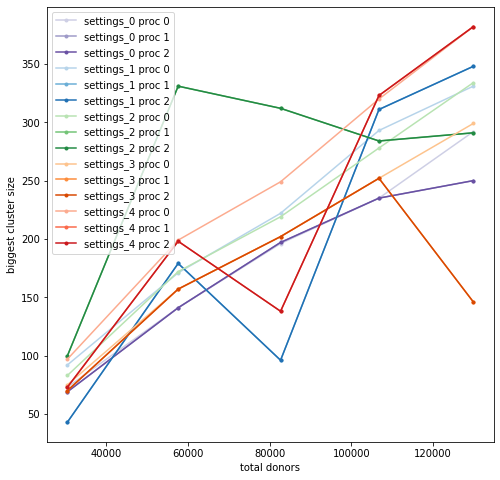

In [43]:
plt.figure(figsize=(8,8))
for s in biggest_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('biggest cluster size')
plt.legend()

In [68]:
biggest_size_sets_1 = [[],[],[],[],[]]
for i,file in enumerate(files):
    data_cut = data_df[data_df['settings_file_proc'] == file].sort_values('total_donors')
    for level in processing:
        color = colors[i][level]
        data_set=data_cut[data_cut['processing']==level]
        biggest_size_sets_1[i].append([data_set['total_donors'].values, data_set['biggest_cluster_size'].values, 
                           file + ' proc ' + str(level),
                           color])

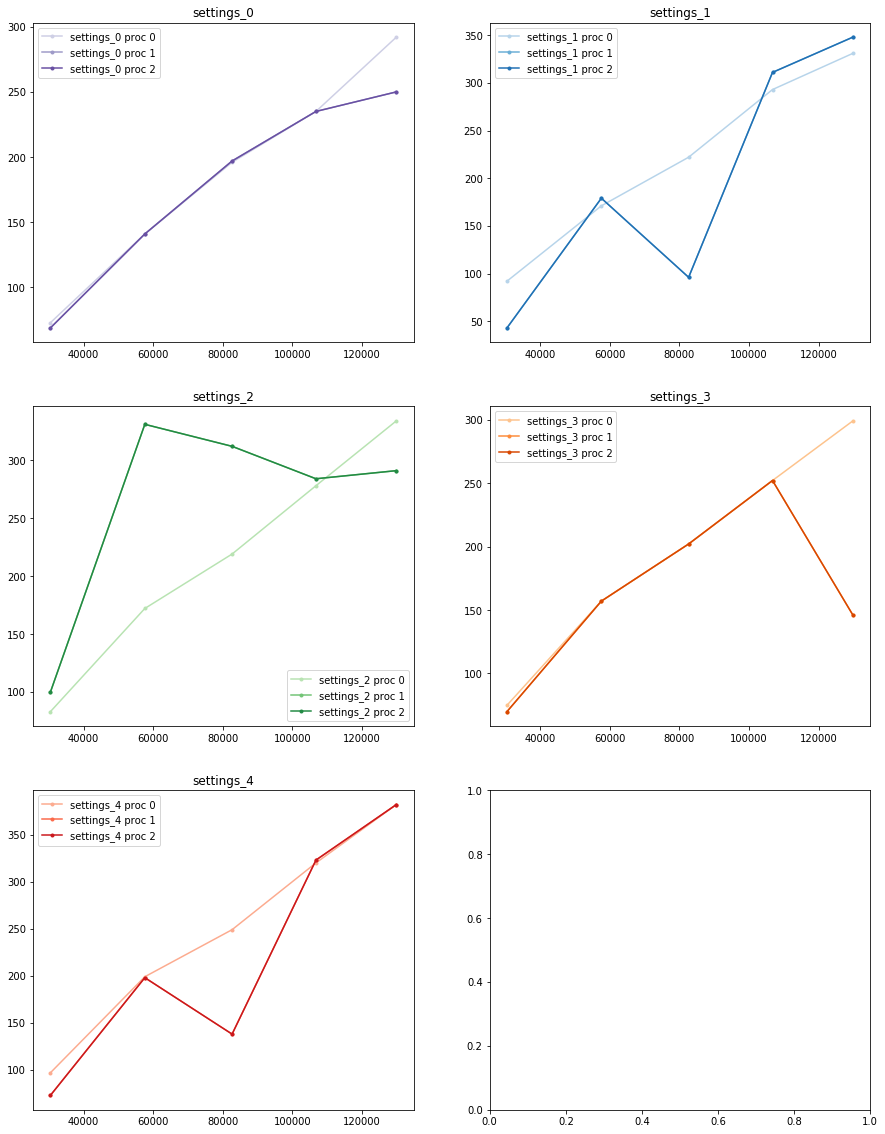

In [69]:
fig, axs = plt.subplots(3, 2,figsize=(15,20))
plt_num = 0
for x in range(3):
    for y in range(2):
        if plt_num < 5:
            s = biggest_size_sets_1[plt_num]
            for line in s:
                axs[x,y].plot(line[0],line[1], ms=6, marker='.', label=line[2], color=line[3])
                axs[x,y].set_title(line[2].split(" ")[0])
                axs[x,y].legend()
            plt_num += 1

In [44]:
total_clusters_sets = []
for i,file in enumerate(files):
    data_cut = data_df[data_df['settings_file_proc'] == file].sort_values('total_donors')
    for level in processing:
        color = colors[i][level]
        data_set=data_cut[data_cut['processing']==level]
        total_clusters_sets.append([data_set['total_donors'].values, data_set['total_clusters'].values, 
                           file + ' proc ' + str(level),
                           color])

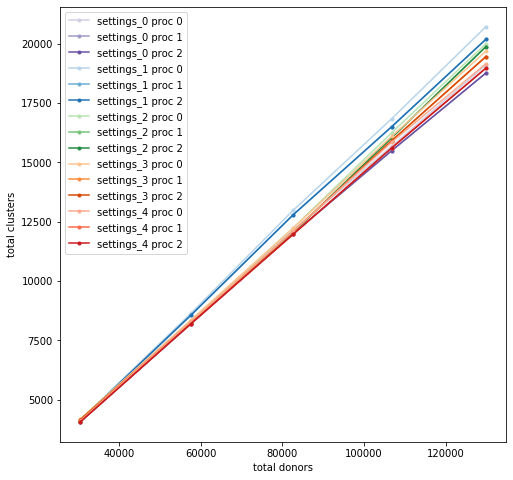

In [45]:
plt.figure(figsize=(8,8))
for s in total_clusters_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('total clusters')
plt.legend()

In [52]:
total_clusters_sets_1 = [[],[],[],[],[]]
for i,file in enumerate(files):
    data_cut = data_df[data_df['settings_file_proc'] == file].sort_values('total_donors')
    for level in processing:
        color = colors[i][level]
        data_set=data_cut[data_cut['processing']==level]
        total_clusters_sets_1[i].append([data_set['total_donors'].values, data_set['total_clusters'].values, 
                           file + ' proc ' + str(level),
                           color])

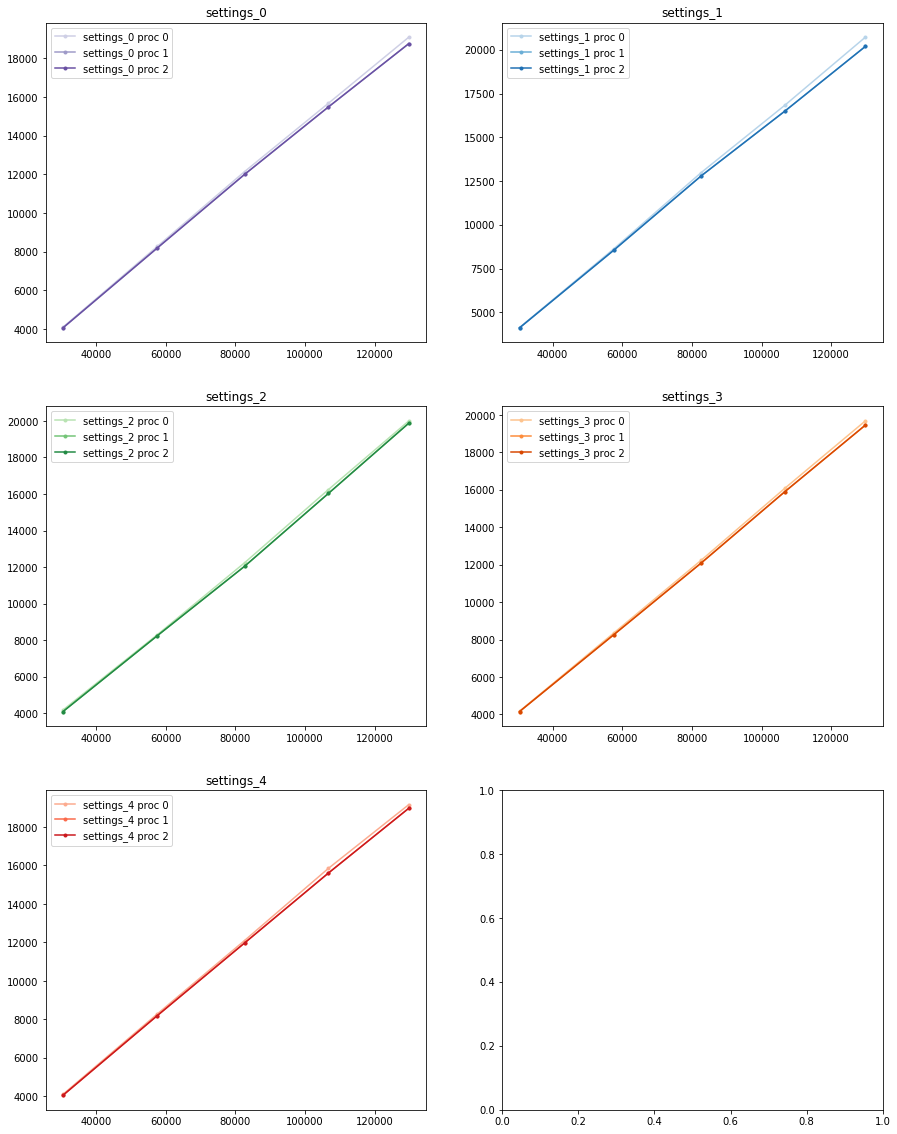

In [65]:
fig, axs = plt.subplots(3, 2,figsize=(15,20))
plt_num = 0
for x in range(3):
    for y in range(2):
        if plt_num < 5:
            s = total_clusters_sets_1[plt_num]
            for line in s:
                axs[x,y].plot(line[0],line[1], ms=6, marker='.', label=line[2], color=line[3])
                axs[x,y].set_title(line[2].split(" ")[0])
                axs[x,y].legend()
            plt_num += 1